In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from echoes import ESNGenerative
from echoes.datasets import load_mackeyglasst17
from echoes.model_selection import GridSearch
from echoes.plotting import plot_predicted_ts, set_mystyle
set_mystyle()


data = load_mackeyglasst17().reshape(-1, 1)[: 5000]
y_train, y_test = train_test_split(data, shuffle=False, test_size=0.2)

param_grid = dict(
    # Fixed params
    n_inputs=[1],
    n_outputs=[1],
    teacher_forcing=[True],
    random_state=[10],
    # Variable params
    n_reservoir=[150, 200],
    ridge_alpha=np.logspace(-15, 0, 15),
    regression_method=["ridge"],
#     sparsity=[0, .1, .8,],
#     bias=[0, 0.5, 1],
    spectral_radius=[.8, .9, .95],
    leak_rate=[.2, ]#.4, .6],
)

grid = GridSearch(
    ESNGenerative,
    param_grid=param_grid,
    validation_size=0.3,
    verbose=5,
    n_jobs=-2
).fit(None, y_train)

print("best parameters:", grid.best_params_)
print("best parameters index:", grid.best_params_idx_)
print("best score:", grid.best_score_)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:    4.9s finished


best parameters: {'leak_rate': 0.2, 'n_inputs': 1, 'n_outputs': 1, 'n_reservoir': 200, 'random_state': 10, 'regression_method': 'ridge', 'ridge_alpha': 2.275845926074791e-10, 'spectral_radius': 0.95, 'teacher_forcing': True}
best parameters index: 62
best score: 0.967893265949301


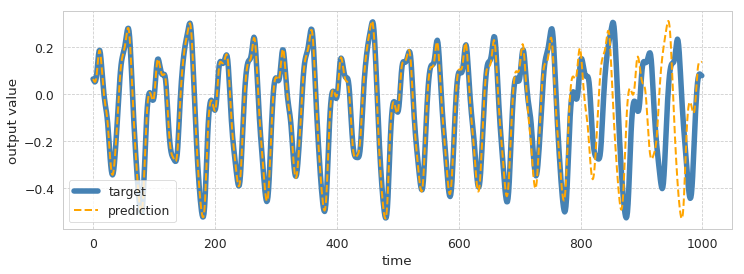

In [7]:
pred = grid.best_esn_.predict(n_steps=y_test.shape[0])
plot_predicted_ts(y_test, pred, figsize=(12, 4))

In [8]:
# We can export results as pandas DataFrame
grid.to_dataframe().head()

# or as cvs
grid.to_dataframe().to_csv("filename")

,leak_rate,n_inputs,n_outputs,n_reservoir,random_state,regression_method,ridge_alpha,spectral_radius,teacher_forcing,scores
0,0.2,1,1,150,10,ridge,1.000000e-15,0.80,True,0.506411
1,0.2,1,1,150,10,ridge,1.000000e-15,0.90,True,0.476552
2,0.2,1,1,150,10,ridge,1.000000e-15,0.95,True,0.493998
3,0.2,1,1,150,10,ridge,1.178769e-14,0.80,True,0.493410
4,0.2,1,1,150,10,ridge,1.178769e-14,0.90,True,0.073962
